In [2]:
#!pip install --upgrade pip
!pip install pyathena


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
#Upgrade de la version de seaborn para poder hacer graficos mas facil 
!pip install seaborn==0.12.2


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [4]:
#Libraries
from pyathena import connect
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [5]:
# DB Setting
bucket_name = 's3://viamericas-datalake-dev-us-east-1-283731589572-athena/'
origin_name = 'AwsDataCatalog'
database_name1 = 'viamericas'
database_name2 = 'analytics'
tabla1 = 'tb2_fraud_jp'
tabla2 = 'tb_fraud_jp'
tabla3 = 'receiver'
tablaVec = 'fraud_vectors_v2_1'

In [6]:
conn = connect(s3_staging_dir=f'{bucket_name}queryresults/',
               region_name='us-east-1')

df_vectores = pd.read_sql(f'SELECT * FROM {origin_name}.{database_name1}.{tablaVec} limit 100000;', conn)

#sender_minutes_since_last_transaction, net_amount_receiver, sender_days_to_last_transaction, sender_sending_days

/tmp/ipykernel_278/1495168566.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_vectores = pd.read_sql(f'SELECT * FROM {origin_name}.{database_name1}.{tablaVec} limit 100000;', conn)


In [7]:
df_vectores.head()

,weekday_6.0,idpayer_fraud,payout_t,address_receiver_transaction_count,payout_n,payout_o,payout_s,hour_sender,mode_pay_receiver,sender_minutes_since_last_transaction,...,weekday_2.0,weekday_1,sender_sending_days,sender_fraud,id_country_receiver,id_receiver,in_range,idlocation_fraud,receiver_fraud,day
0,0,0.463968,0,NaN,0,0,0,23,C,53426.0,...,0,0,343.0,0,MEX,40001.0,0,0.0,0,2024-01-28
1,0,0.000000,0,27.0,0,0,0,23,C,42436.0,...,0,1,230.0,0,IND,182069.0,0,0.0,0,2024-01-30
2,0,0.000000,0,1.0,0,0,0,3,C,107928.0,...,0,0,135.0,0,PHL,179622.0,1,0.0,0,2024-01-16
3,1,0.177748,0,13.0,0,0,0,23,C,81236.0,...,0,0,822.0,0,MEX,19270.0,1,0.0,0,2024-01-15
4,0,0.000000,0,NaN,0,0,0,23,C,46080.0,...,0,0,670.0,0,PHL,182206.0,0,0.0,0,2024-01-31


In [8]:
df_vectores.columns.values

array(['weekday_6.0', 'idpayer_fraud', 'payout_t',
       'address_receiver_transaction_count', 'payout_n', 'payout_o',
       'payout_s', 'hour_sender', 'mode_pay_receiver',
       'sender_minutes_since_last_transaction', 'id_sales_representative',
       'weekday_3.0', 'net_amount_receiver', 'receiver_transaction_count',
       'payout_c', 'weekday_3', 'weekday_6', 'payout_7',
       'transaction_unique', 'payout_6', 'payout_p', 'weekday_2',
       'weekday_4.0', 'payout_x', 'id_branch', 'weekday_4', 'payout_4',
       'branch_minutes_since_last_transaction', 'weekday_5', 'id',
       'sender_days_to_last_transaction', 'branch_working_days',
       'payout_m', 'tx_brancity', 'weekday_1.0', '%tx_brancity',
       'payout_d', 'weekday_5.0', 'date_created', 'payout_1', 'payout_2',
       'payout_3', 'payout_5', 'payout_0', 'weekday_2.0', 'weekday_1',
       'sender_sending_days', 'sender_fraud', 'id_country_receiver',
       'id_receiver', 'in_range', 'idlocation_fraud', 'receiver_fraud

## Distribucion de las variables para estandarizar

In [9]:
df_vectores_sample = df_vectores.sample(n=30000)

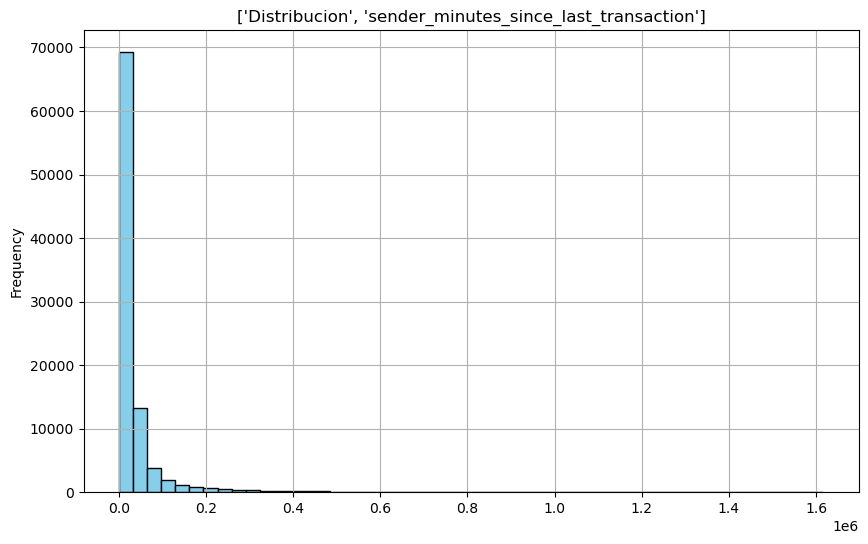

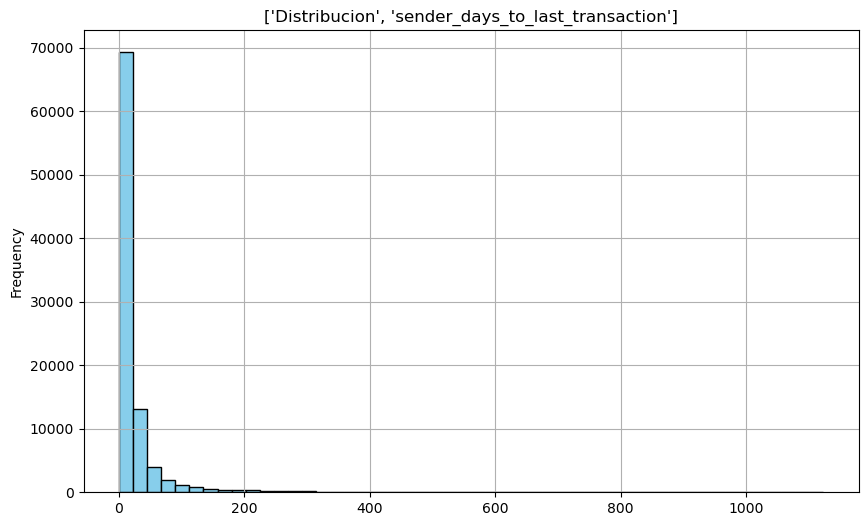

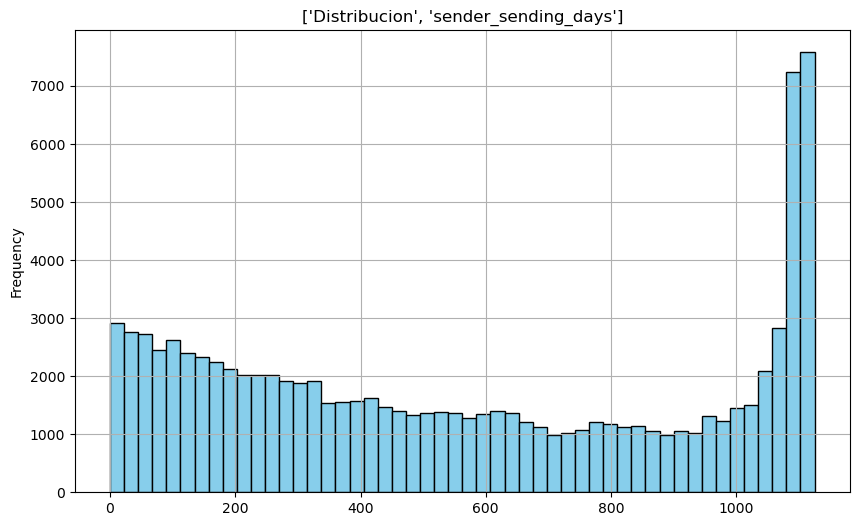

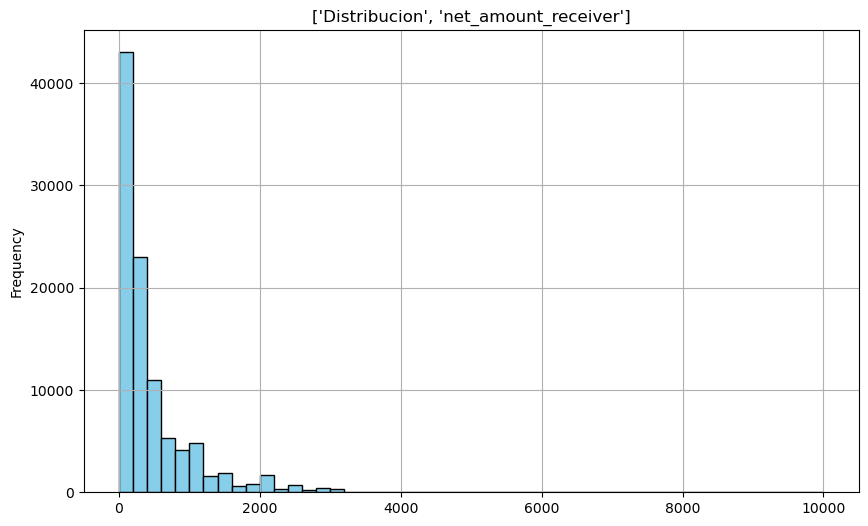

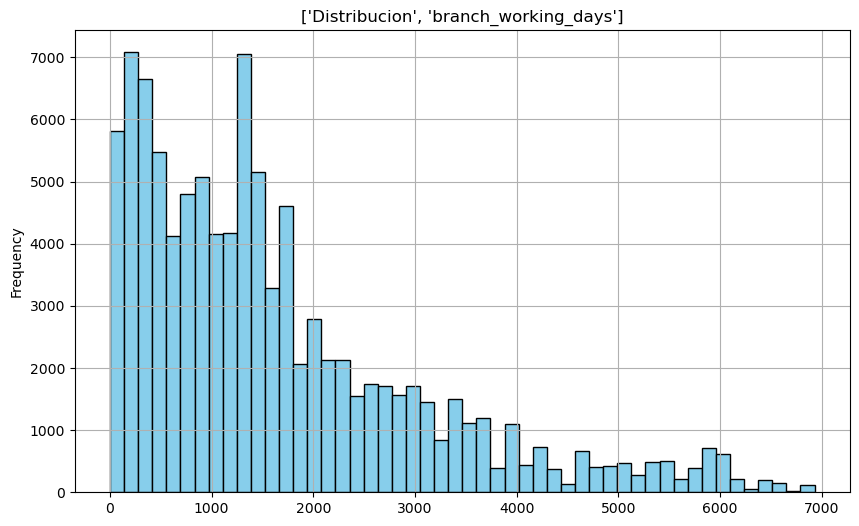

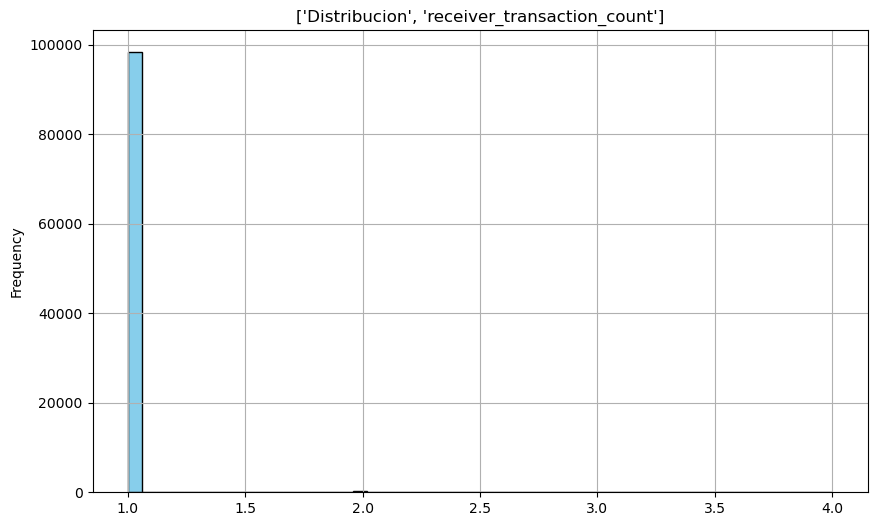

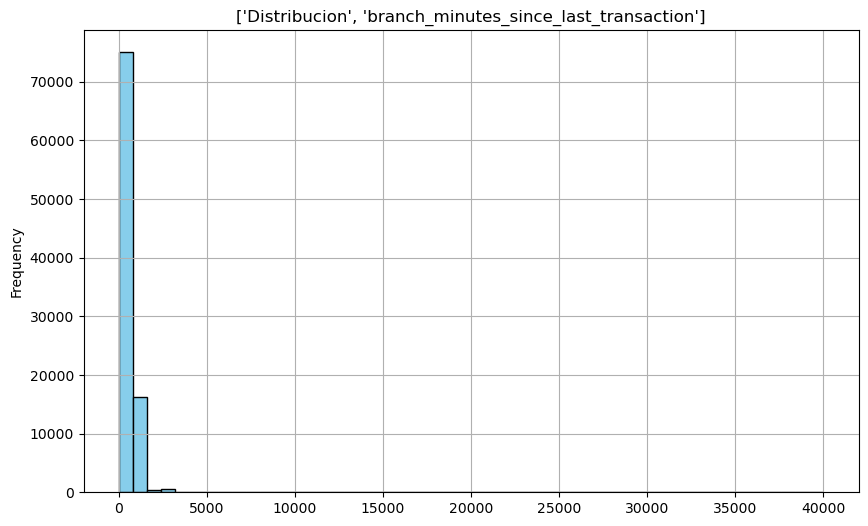

In [11]:
vars = ['sender_minutes_since_last_transaction','sender_days_to_last_transaction','sender_sending_days','net_amount_receiver',
        'branch_working_days','receiver_transaction_count','branch_minutes_since_last_transaction']

for var in vars:
    plt.figure(figsize = (10,6))
    plt.hist(df_vectores[var], bins=50, color='skyblue', edgecolor='black')
    plt.ylabel('Frequency')
    plt.title(['Distribucion', var])
    plt.grid(True)
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categ

<AxesSubplot:xlabel='weekday_1', ylabel='sender_minutes_since_last_transaction'>

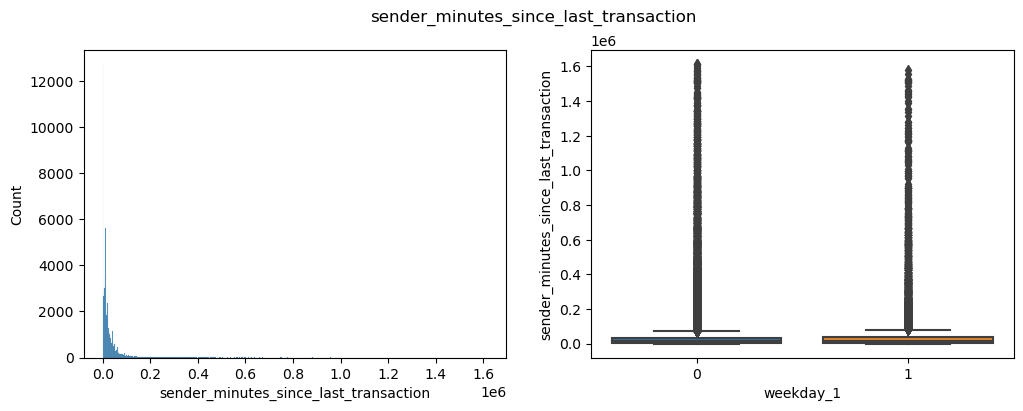

In [12]:
fig, axs = plt.subplots(1,2,figsize = (12, 4))
fig.suptitle('sender_minutes_since_last_transaction')
sns.histplot(data=df_vectores, x="sender_minutes_since_last_transaction", ax = axs[0])
sns.boxplot(data = df_vectores, x ='weekday_1', y = 'sender_minutes_since_last_transaction', ax = axs[1])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


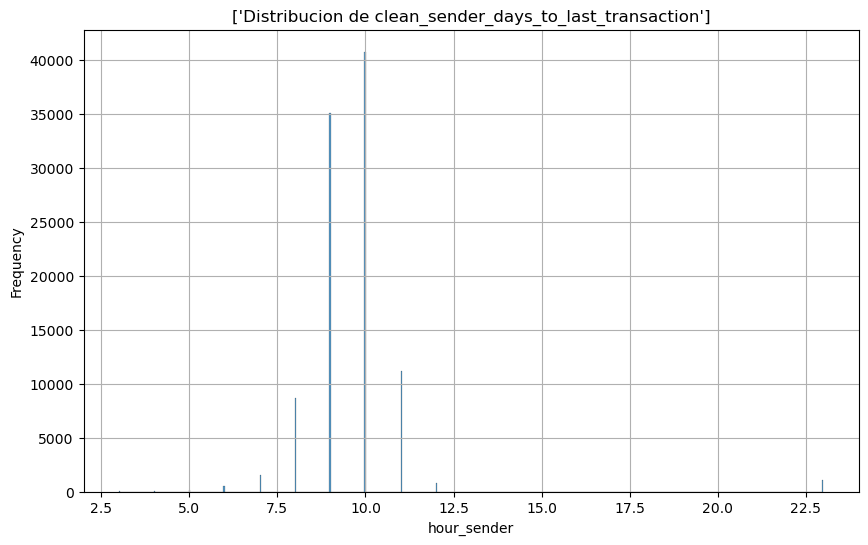

In [13]:
plt.figure(figsize = (10,6))
sns.histplot(data=df_vectores, x="hour_sender")
plt.ylabel('Frequency')
plt.title(['Distribucion de clean_sender_days_to_last_transaction'])
plt.grid(True)
plt.show()

## Limpieza de datos
### Variables = sender_days_to_last_transaction, sender_minutes_since_last_transaction

In [14]:
df_vectores['sender_days_to_last_transaction'].describe()

count    93776.000000
mean        28.197513
std         72.021574
min          0.000000
25%          4.000000
50%         10.000000
75%         24.000000
max       1123.000000
Name: sender_days_to_last_transaction, dtype: float64

/tmp/ipykernel_278/306420355.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vectores.sender_more_Xdays_to_last_transaction[df_vectores['sender_days_to_last_transaction']> 365] = 1
/tmp/ipykernel_278/306420355.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vectores.clean_sender_days_to_last_transaction[df_vectores['sender_days_to_last_transaction']> 365] = 0


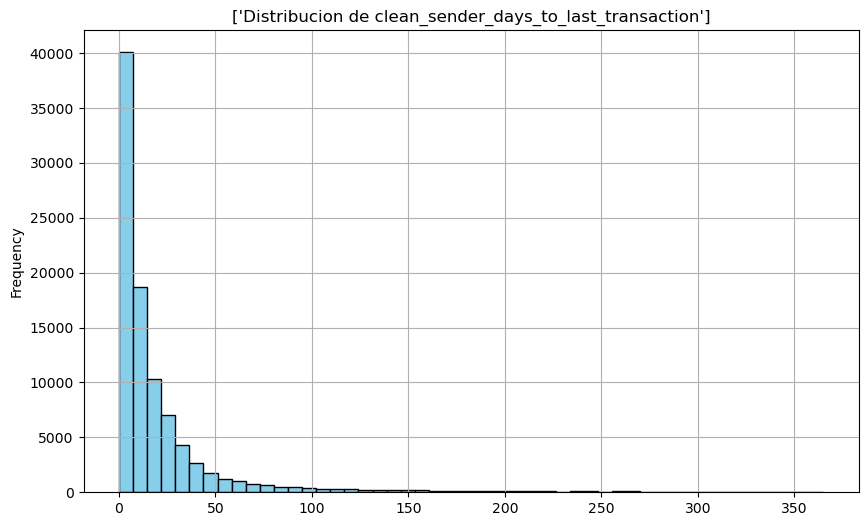

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='clean_sender_days_to_last_transaction'>

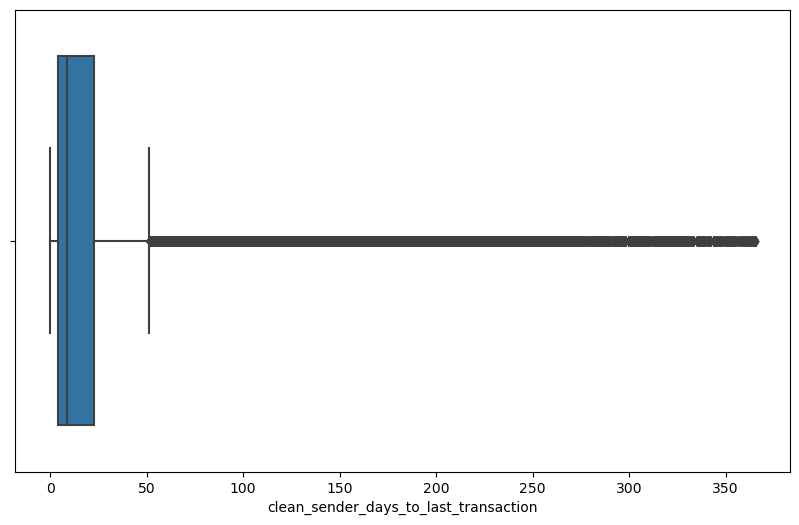

In [15]:
#defino dos nuevas variables a partir de la anterior
df_vectores['clean_sender_days_to_last_transaction'] = df_vectores['sender_days_to_last_transaction']
df_vectores['sender_more_Xdays_to_last_transaction'] = 0
#corto en un maximo de dias y el resto lo pongo enlas variables nuevas
df_vectores.sender_more_Xdays_to_last_transaction[df_vectores['sender_days_to_last_transaction']> 365] = 1
df_vectores.clean_sender_days_to_last_transaction[df_vectores['sender_days_to_last_transaction']> 365] = 0 

plt.figure(figsize = (10,6))
plt.hist(df_vectores['clean_sender_days_to_last_transaction'], bins=50, color='skyblue', edgecolor='black')
plt.ylabel('Frequency')
plt.title(['Distribucion de clean_sender_days_to_last_transaction'])
plt.grid(True)
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(data = df_vectores, x = 'clean_sender_days_to_last_transaction')

In [16]:
df_vectores['sender_minutes_since_last_transaction'].describe()

count    9.377600e+04
mean     4.041749e+04
std      1.036931e+05
min      0.000000e+00
25%      5.722000e+03
50%      1.401250e+04
75%      3.428425e+04
max      1.616816e+06
Name: sender_minutes_since_last_transaction, dtype: float64

/tmp/ipykernel_278/3131872196.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vectores.sender_minutes_since_last_transaction_last_days[df_vectores['sender_minutes_since_last_transaction_last_days']> 2*24*60] = 0


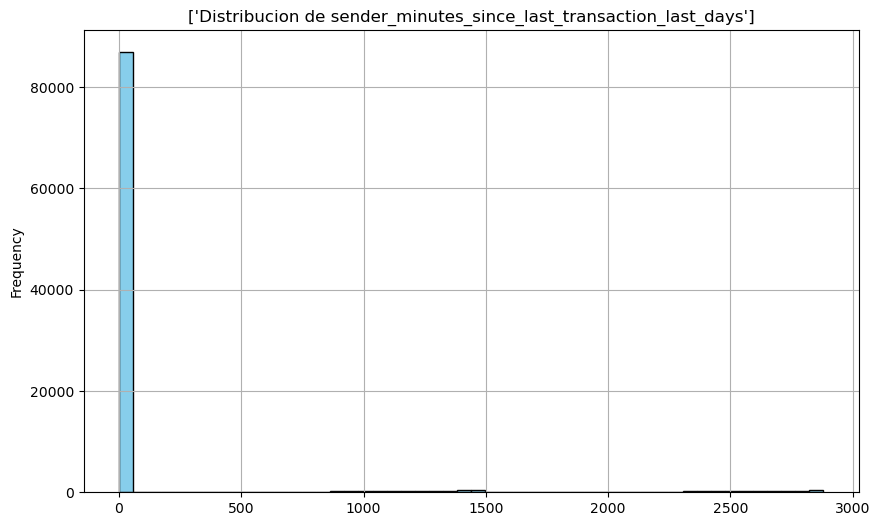

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<AxesSubplot:xlabel='sender_minutes_since_last_transaction_last_days'>

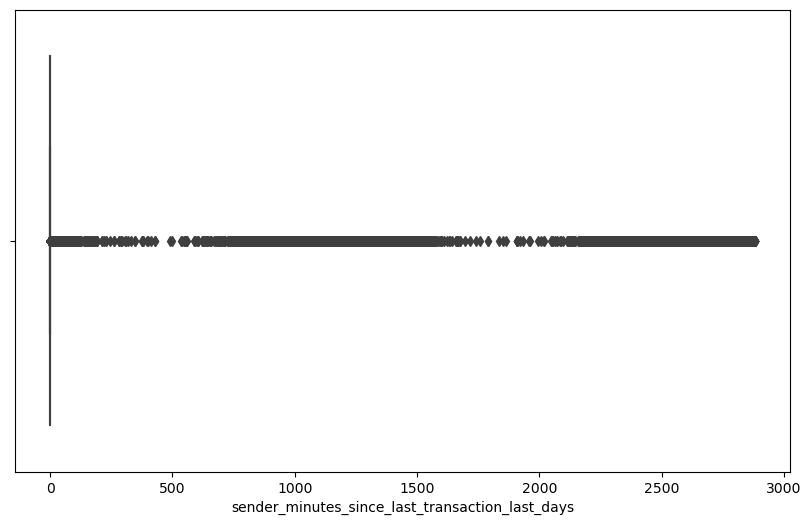

In [17]:
#Creo variable solo con los minutos para los dos ultimos dias
df_vectores['sender_minutes_since_last_transaction_last_days'] = df_vectores['sender_minutes_since_last_transaction']
df_vectores.sender_minutes_since_last_transaction_last_days[df_vectores['sender_minutes_since_last_transaction_last_days']> 2*24*60] = 0 

plt.figure(figsize = (10,6))
plt.hist(df_vectores['sender_minutes_since_last_transaction_last_days'], bins=50, color='skyblue', edgecolor='black')
plt.ylabel('Frequency')
plt.title(['Distribucion de sender_minutes_since_last_transaction_last_days'])
plt.grid(True)
plt.show()

plt.figure(figsize = (10,6))
sns.boxplot(data = df_vectores, x = 'sender_minutes_since_last_transaction_last_days')

In [18]:
df_vectores['sender_sending_days'].describe()

count    93776.000000
mean       569.636080
std        382.892755
min          0.000000
25%        212.000000
50%        527.000000
75%        977.000000
max       1125.000000
Name: sender_sending_days, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='sender_sending_days', ylabel='Count'>

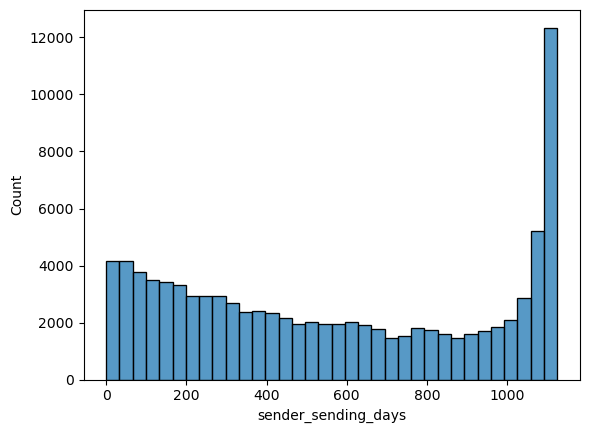

In [19]:
sns.histplot(data=df_vectores, x="sender_sending_days")

In [20]:
df_vectores['net_amount_receiver'].describe()

count    100000.000000
mean        451.452659
std         591.626053
min           0.000000
25%         100.000000
50%         218.000000
75%         514.000000
max       10000.000000
Name: net_amount_receiver, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<AxesSubplot:xlabel='net_amount_receiver', ylabel='Count'>

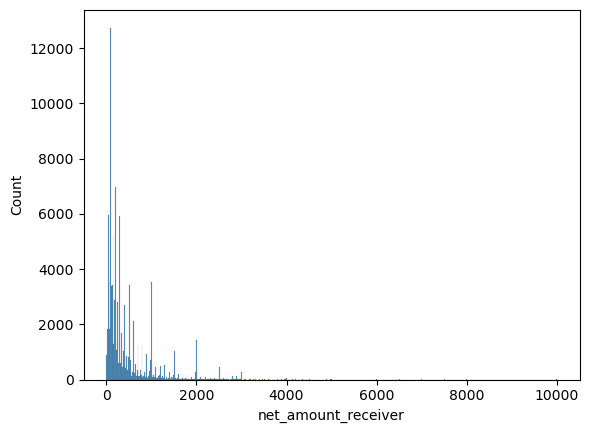

In [21]:
sns.histplot(data=df_vectores, x="net_amount_receiver")